In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading data

In [2]:
movies = pd.read_csv('../data/movies/movies.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
links = pd.read_csv('../data/movies/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
ratings = pd.read_csv('../data/movies/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
tags = pd.read_csv('../data/movies/ratings.csv')
tags.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [7]:
tags.shape == ratings.shape

True

tags.csv and ratings.csv are the same file!

In [8]:
movies.movieId.unique().shape

(9125,)

In [9]:
movies.shape

(9125, 3)

Two movies are duped. Since it's two out of 9123, I'm not sure it matters, but we could add them together if we wanted to. This may be a bigger issue with the larger dataset.

In [10]:
movies.groupby('title').count().sort_values('movieId', ascending = False).head()

,movieId,genres
title,,
Hamlet (2000),2,2
War of the Worlds (2005),2,2
"""Great Performances"" Cats (1998)",1,1
"Patriot, The (2000)",1,1
Patton (1970),1,1


In [11]:
movies[movies.title.isin(['Hamlet (2000)','War of the Worlds (2005)'])]

,movieId,title,genres
2872,3598,Hamlet (2000),Crime|Drama|Romance|Thriller
6172,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
7127,64997,War of the Worlds (2005),Action|Sci-Fi
7151,65665,Hamlet (2000),Drama


## EDA

In [12]:
list(ratings.groupby('rating').count().userId)

[1101, 3326, 1687, 7271, 4449, 20064, 10538, 28750, 7723, 15095]

''

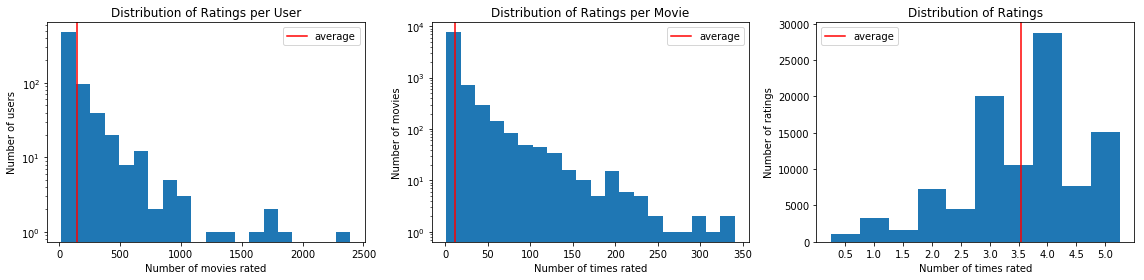

In [13]:
fig, ax = plt.subplots(1,3, figsize= (16,4))


ax[0].hist(ratings.groupby('userId').count().movieId, bins = 20, label = '')
ax[0].set_xlabel('Number of movies rated')
ax[0].set_ylabel('Number of users')
ax[0].set_title('Distribution of Ratings per User')
ax[0].set_yscale('log')
ax[0].axvline(np.mean(ratings.groupby('userId').count().movieId), c= 'r', label = 'average')
ax[0].legend()

ax[1].hist(ratings.groupby('movieId').count().userId, bins = 20, label = '')
ax[1].set_xlabel('Number of times rated')
ax[1].set_ylabel('Number of movies')
ax[1].set_title('Distribution of Ratings per Movie')
ax[1].set_yscale('log')
ax[1].axvline(np.mean(ratings.groupby('movieId').count().userId), c= 'r', label = 'average')
ax[1].legend()

rating = list(ratings.groupby('rating').count().index)
frequency = list(ratings.groupby('rating').count().userId)

ax[2].bar(rating, frequency, width=.5)
ax[2].set_xlabel('Number of times rated')
ax[2].set_ylabel('Number of ratings')
ax[2].set_title('Distribution of Ratings')
ax[2].set_xticks(rating)
ax[2].axvline(ratings.rating.mean(), c= 'r', label = 'average')
ax[2].legend()

plt.tight_layout()
;

In [14]:
ratings.rating.mean()

3.543608255669773

(array([ 8025.,  3371., 22879.,  8991., 12486.,  9643.,  7276.,  7365.,
         6040., 13928.]),
 array([7.89652009e+08, 8.58350872e+08, 9.27049736e+08, 9.95748600e+08,
        1.06444746e+09, 1.13314633e+09, 1.20184519e+09, 1.27054405e+09,
        1.33924292e+09, 1.40794178e+09, 1.47664064e+09]),
 <a list of 10 Patch objects>)

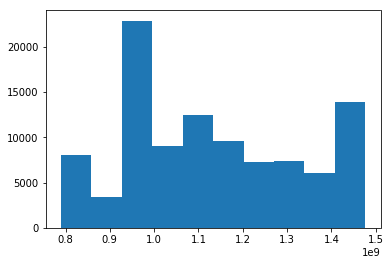

In [15]:
plt.hist(ratings.timestamp)

In [16]:
print('average number of ratings per movie: {}'.format(np.mean(ratings.groupby('movieId').count().userId)))
print('average number of ratings per user: {}'.format(np.mean(ratings.groupby('userId').count().movieId)))

average number of ratings per movie: 11.030664019413193
average number of ratings per user: 149.03725782414307


nobody rated a movie more than once

In [17]:
np.max(ratings.groupby(['userId','movieId']).count().rating)

1

## Movie by genre

In [18]:
movies.genres = movies.genres.apply(lambda row: row.split('|'))

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
movies = movies.join(pd.DataFrame(mlb.fit_transform(movies.pop('genres')),
                          columns=mlb.classes_,
                          index=movies.index))
movies.rename(columns={'(no genres listed)':'none'}, inplace=True)

In [19]:
movies.head()

,movieId,title,none,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.metrics import pairwise_distances

In [26]:
dist_out = 1-pairwise_distances(movies.iloc[:,2:], metric="cosine")
simimlarities = pd.DataFrame(dist_out)

In [31]:
simimlarities.head(3)

,0,1,2,3,4,5,6,7,8,9,...,9115,9116,9117,9118,9119,9120,9121,9122,9123,9124
0,1.000000,0.774597,0.316228,0.258199,0.447214,0.0,0.316228,0.632456,0.0,0.258199,...,0.0,0.223607,0.0,0.0,0.0,0.258199,0.447214,0.0,0.447214,0.0
1,0.774597,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.816497,0.0,0.333333,...,0.0,0.288675,0.0,0.0,0.0,0.333333,0.577350,0.0,0.000000,0.0
2,0.316228,0.000000,1.000000,0.816497,0.707107,0.0,1.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.5,0.408248,0.000000,0.0,0.707107,0.0


In [87]:
title_sims = simimlarities.copy()
title_sims.index = movies.title.replace(' ','_')
title_sims.columns = movies.title.replace(' ','_')
title_sims.head(30)

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Body (2015),Sharknado 4: The 4th Awakens (2016),The Last Brickmaker in America (2001),Stranger Things,Rustom (2016),Mohenjo Daro (2016),Shin Godzilla (2016),The Beatles: Eight Days a Week - The Touring Years (2016),The Gay Desperado (1936),"Women of '69, Unboxed"
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.000000,0.223607,0.000000,0.000000,0.000000,0.258199,0.447214,0.0,0.447214,0.0
Jumanji (1995),0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.288675,0.000000,0.000000,0.000000,0.333333,0.577350,0.0,0.000000,0.0
Grumpier Old Men (1995),0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.408248,0.000000,0.0,0.707107,0.0
Waiting to Exhale (1995),0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.333333,0.000000,0.577350,0.577350,0.408248,0.666667,0.000000,0.0,0.577350,0.0
Father of the Bride Part II (1995),0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0
Heat (1995),0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.577350,0.666667,...,0.333333,0.288675,0.000000,0.000000,0.408248,0.000000,0.288675,0.0,0.000000,0.0
Sabrina (1995),0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.408248,0.000000,0.0,0.707107,0.0
Tom and Huck (1995),0.632456,0.816497,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.408248,...,0.000000,0.353553,0.000000,0.000000,0.000000,0.408248,0.353553,0.0,0.000000,0.0
Sudden Death (1995),0.000000,0.000000,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,1.000000,0.577350,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.000000,0.0


In [ ]:
list(np.argsort(title_sims['GoldenEye (1995)'])[::-1])[1:]

In [82]:
def similar_by_genre(movie, num):
    similar_list = list(np.argsort(title_sims[movie])[::-1])[1:num+1]
    similar_movies = []
    for i in similar_list:
        similar_movies.append(title_sims.iloc[0].index[i])
    print(similar_movies)

In [83]:
title_sims.iloc[0].index[10]

'American President, The (1995)'

In [88]:
similar_by_genre('GoldenEye (1995)', 5)

['Tomorrow Never Dies (1997)', 'Living Daylights, The (1987)', 'Maximum Conviction (2012)', 'Raiders of the Lost Ark: The Adaptation (1989)', 'Rambo: First Blood Part II (1985)']


In [45]:
def most_similar_movie(i, num):
    your_movie = title_sims.iloc[i].index[i]
    top_movies = []
    top_movie_sims = []
    for n in range(num):
        top_movie = title_sims[title_sims.iloc[:,i] == np.sort(title_sims.iloc[:,i])[-(0+n)]].index[0]
        top_movies.append(top_movie)
        top_movie_sim = np.sort(title_sims.iloc[:,i])[-(0+n)]
        top_movie_sims.append(top_movie_sim)
    print('your movie: {}'.format(your_movie))
    for n in range(num):
        print('#{0}: {1}, {2:.2f}'.format(n+1, top_movies[n], top_movie_sims[n]))

In [46]:
most_similar_movie(1, 5)

your movie: Jumanji (1995)
#1: Grumpier Old Men (1995), 0.00
#2: Jumanji (1995), 1.00
#3: Jumanji (1995), 1.00
#4: Jumanji (1995), 1.00
#5: Jumanji (1995), 1.00
